# CNNs

Build a convolutional neural network to classify objects and tune hyperparameters to optimize your model.

---

## Problem Description
### Dataset
This dataset consists of four different classes: **Bicycle, Motorcycle, Car, Truck**. Bicycle, Motorcycle, and Car data are collected from the 2005 PASCAL dataset [VOC2005](http://host.robots.ox.ac.uk/pascal/VOC/databases.html#VOC2005_1). Moreover, the Truck data is collected from the Internet (see examples below).

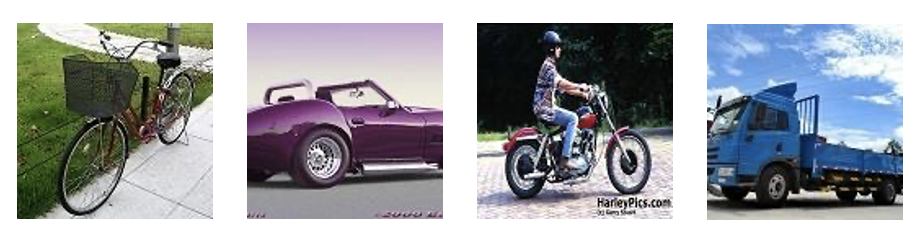

- The width and height of each **RGB** image are 120 pixels and 120 pixels respectively.
- The filename of an image represents its index.
- Labels are saved in `labels.csv` where the first column is the image index and the second column is the label.
- Labels and their corresponding classes are listed below.

|Label|0|1|2|3|
|-----|:-:|:-:|:-:|:-:|
|Class|Bicycle|Car|Motocycle|Truck|


### Tasks

1. Load and pre-process data
2. Build your CNN model
3. Train your model
4. Tune hyperparameters
5. Conclusion
    - Visualize the optimal model.
    - Describe its hyperparameters.
    - Plot the performance.
    - Plot some examples of prediction results.

## Task 1: Load and Pre-Process Dataset

D:\Anaconda\lib\site-packages\matplotlib\text.py:1163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


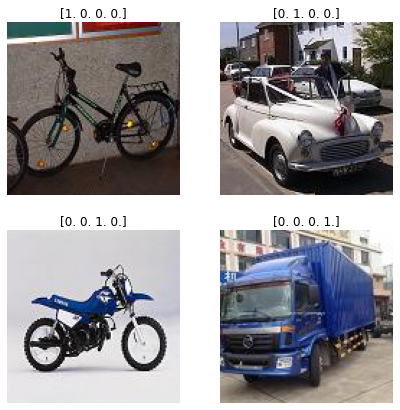

In [1]:
import numpy as np
from PIL import Image
from numpy import argmax
import matplotlib.pyplot as plt
import os
import csv
from tensorflow.keras.utils import to_categorical

# TODO: write your code here

def load_data(folder):
    images = []
    labels_list = []
    
    # Loading the data from dataset folder
    for filename in os.listdir(folder):
        # Reading 'labels.csv' file to create labels_list
        if os.path.splitext(filename)[1] == ".csv":
            with open(os.path.join(folder, filename), newline = '') as l_file:
                label_reader = csv.reader(l_file)
                labels_list = list(label_reader)
                  
        else:
            # Importing images from dataset folder
            img = Image.open(os.path.join(folder, filename))
            # converting images in arrays list - images
            images.append(np.array(img))
    
    return labels_list, images
 
# Pre-processing the loaded data and returning training and test sets
def preprocess(labels_list, images):
    img_norm = []
    
    # Normalization
    for i in images:
        img_norm.append(i/255)
    
    # One-hot encoding
    labels = [] 
    for l in labels_list[1:]:
        labels.append(l[1])
    ohe_labels =  to_categorical(labels)
    
    # splitting data to training set and test set
    l = round(len(img_norm)*0.8)
    Train_imgs = np.array(img_norm[:l])
    Test_imgs = np.array(img_norm[l:])
    Train_labels = ohe_labels[:l,:]
    Test_labels = ohe_labels[l:,:]
    Train_imgs = Train_imgs.reshape(l, 120, 120, 3)
    Test_imgs = Test_imgs.reshape((len(img_norm)-l), 120, 120, 3)
    
    return Train_imgs, Test_imgs, Train_labels, Test_labels



y_list, img = load_data('dataset/')
tr_imgs, tst_imgs, tr_lbls, tst_lbls = preprocess(y_list, img)

# Plotting training sample of each class
plt.figure(figsize=(7,7))
for v in range(0,4):
    for i in range(0, len(tr_imgs)):
        x = argmax(tr_lbls[i,:])
        if x == v:
            ex_img = tr_imgs[i]
            ex_labels = tr_lbls[i]
    
    plt.subplot(2, 2, v+1)
    plt.imshow(ex_img)
    plt.title(ex_labels)
    plt.axis('off')

## Task 2: Build Convolutional Neural Network

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam

# TODO: write your code here
input_shape = tr_imgs[0].shape
n_cat = len(tr_lbls[1])
# Model Initialization
model = Sequential()

# Convolutional layers and pooling to get the best features
model.add(Conv2D(32, kernel_size=(3,3), activation ='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3), activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Flattening data
model.add(Flatten())

# Fully connected layers
model.add(Dense(64, activation='relu'))

# Output layer - Softmax activation
model.add(Dense(n_cat, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 118, 118, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 59, 59, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 57, 57, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                3211328   
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 2

## Task 3: Train Model

Epoch 1/5
6/6 [==============================] - 5s 748ms/step - loss: 1.3543 - accuracy: 0.5592 - val_loss: 0.8892 - val_accuracy: 0.6789
Epoch 2/5
6/6 [==============================] - 4s 714ms/step - loss: 0.9880 - accuracy: 0.6033 - val_loss: 0.9950 - val_accuracy: 0.5474
Epoch 3/5
6/6 [==============================] - 4s 730ms/step - loss: 0.7830 - accuracy: 0.6704 - val_loss: 0.8326 - val_accuracy: 0.6684
Epoch 4/5
6/6 [==============================] - 4s 748ms/step - loss: 0.6506 - accuracy: 0.8026 - val_loss: 0.6758 - val_accuracy: 0.7263
Epoch 5/5
6/6 [==============================] - 4s 727ms/step - loss: 0.5364 - accuracy: 0.8158 - val_loss: 0.8500 - val_accuracy: 0.6579
Test loss:  0.8500375747680664
Test accuracy: 65.78947305679321%


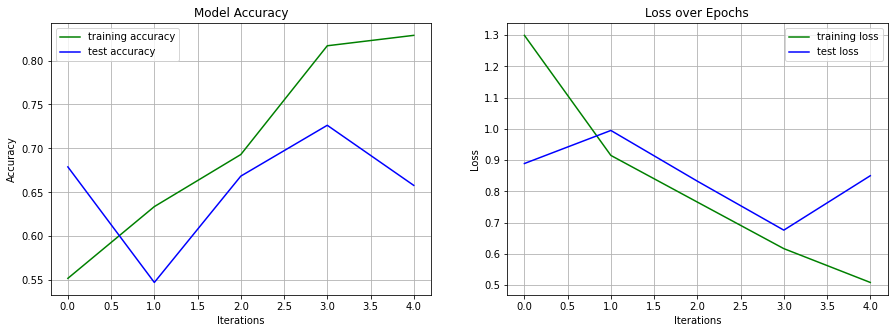

In [4]:
# TODO: write your code here

#Initializing hyperparameters
batch_size = 128
n_epochs = 5

# Compiling and training the model
model.compile(loss=categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])
model_history = model.fit(tr_imgs, tr_lbls, batch_size = batch_size, epochs = n_epochs, validation_data=(tst_imgs, tst_lbls))
model.save_weights('C:\\Users\\vinay\\HW_DL_8930\\HW-3')

# Plotting the Accuracy and loss over all iterations
plt.figure(1, figsize=(15, 5))
plt.subplot(1,2,1)
plt.plot(model_history.history['accuracy'], c='g', label = 'training accuracy')
plt.plot(model_history.history['val_accuracy'], c='b', label = 'test accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Iterations')
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.plot(model_history.history['loss'], c='g', label = 'training loss')
plt.plot(model_history.history['val_loss'], c='b', label = 'test loss')
plt.title('Loss over Epochs')
plt.ylabel('Loss')
plt.xlabel('Iterations')
plt.legend()
plt.grid()

# Evaluating the model on test set
loss, acc = model.evaluate(tst_imgs, tst_lbls, batch_size = batch_size, verbose=0)
print("Test loss: ", loss)
print(f"Test accuracy: {acc * 100}%")



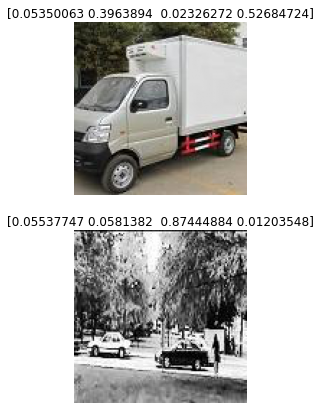

In [25]:
x = np.random.randint(0, 190, size = 2)
# Plotting training sample of each class
plt.figure(2,figsize=(7,7))
ex_labels = model.predict(tst_imgs[x])
for i in range(0, 2):
  
    
    plt.subplot(2, 1, i+1)
    plt.imshow(tst_imgs[x[i]])
    plt.title(ex_labels[i])
    plt.axis('off')

## Task 4: Tune Hyperparameters


Iterations for kernel sizes

Epoch 1/5
6/6 [==============================] - 5s 744ms/step - loss: 3.1059 - accuracy: 0.2783 - val_loss: 1.3471 - val_accuracy: 0.2158
Epoch 2/5
6/6 [==============================] - 4s 731ms/step - loss: 1.3171 - accuracy: 0.3624 - val_loss: 1.2211 - val_accuracy: 0.6211
Epoch 3/5
6/6 [==============================] - 4s 745ms/step - loss: 1.2562 - accuracy: 0.4713 - val_loss: 1.3767 - val_accuracy: 0.2211
Epoch 4/5
6/6 [==============================] - 4s 735ms/step - loss: 1.0764 - accuracy: 0.5172 - val_loss: 0.9931 - val_accuracy: 0.6158
Epoch 5/5
6/6 [==============================] - 4s 736ms/step - loss: 0.8122 - accuracy: 0.7132 - val_loss: 1.0338 - val_accuracy: 0.5421
Epoch 1/5
6/6 [==============================] - 7s 1s/step - loss: 2.8455 - accuracy: 0.3724 - val_loss: 1.4821 - val_accuracy: 0.2158
Epoch 2/5
6/6 [==============================] - 7s 1s/step - loss: 1.3197 - accuracy: 0.3585 - val_loss: 1.2698 - val_accuracy: 0.2158
Epo

<ipython-input-5-01555dd12ee8>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,2,1)
<ipython-input-5-01555dd12ee8>:32: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,2,2)
<ipython-input-5-01555dd12ee8>:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and retur

6/6 [==============================] - 10s 2s/step - loss: 2.4717 - accuracy: 0.3206 - val_loss: 1.3863 - val_accuracy: 0.2211
Epoch 2/5
6/6 [==============================] - 10s 2s/step - loss: 1.3146 - accuracy: 0.3617 - val_loss: 1.1940 - val_accuracy: 0.3684
Epoch 3/5
6/6 [==============================] - 9s 2s/step - loss: 1.1854 - accuracy: 0.5744 - val_loss: 1.0807 - val_accuracy: 0.5158
Epoch 4/5
6/6 [==============================] - 9s 2s/step - loss: 1.0276 - accuracy: 0.5867 - val_loss: 1.3601 - val_accuracy: 0.3526
Epoch 5/5
6/6 [==============================] - 9s 2s/step - loss: 0.8341 - accuracy: 0.6624 - val_loss: 0.9809 - val_accuracy: 0.6263

Comparison of w/ & w/o normalized batch

Epoch 1/5
6/6 [==============================] - 11s 2s/step - loss: 1.4782 - accuracy: 0.5205 - val_loss: 2.5375 - val_accuracy: 0.1474
Epoch 2/5
6/6 [==============================] - 10s 2s/step - loss: 0.6250 - accuracy: 0.7893 - val_loss: 1.3068 - val_accuracy: 0.1684
Epoch 3/5
6/

<ipython-input-5-01555dd12ee8>:126: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,2,1)
<ipython-input-5-01555dd12ee8>:134: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,2,2)
<ipython-input-5-01555dd12ee8>:142: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and re

6/6 [==============================] - 5s 781ms/step - loss: 1.4265 - accuracy: 0.3548 - val_loss: 1.3005 - val_accuracy: 0.2158
Epoch 2/5
6/6 [==============================] - 4s 722ms/step - loss: 1.2918 - accuracy: 0.3387 - val_loss: 1.2266 - val_accuracy: 0.2158
Epoch 3/5
6/6 [==============================] - 4s 722ms/step - loss: 1.1600 - accuracy: 0.4379 - val_loss: 1.0393 - val_accuracy: 0.4737
Epoch 4/5
6/6 [==============================] - 4s 733ms/step - loss: 0.8999 - accuracy: 0.6721 - val_loss: 0.8089 - val_accuracy: 0.6947
Epoch 5/5
6/6 [==============================] - 4s 739ms/step - loss: 0.7031 - accuracy: 0.7084 - val_loss: 0.9648 - val_accuracy: 0.6316

Iterations for number of epochs while model fitting

Epoch 1/5
6/6 [==============================] - 5s 765ms/step - loss: 2.2222 - accuracy: 0.2766 - val_loss: 1.1941 - val_accuracy: 0.6105
Epoch 2/5
6/6 [==============================] - 4s 723ms/step - loss: 1.2732 - accuracy: 0.3885 - val_loss: 1.3187 - val_

<ipython-input-5-01555dd12ee8>:168: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,2,1)
<ipython-input-5-01555dd12ee8>:176: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,2,2)
<ipython-input-5-01555dd12ee8>:184: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and re

6/6 [==============================] - 5s 762ms/step - loss: 1.8590 - accuracy: 0.3649 - val_loss: 1.3710 - val_accuracy: 0.2211
Epoch 2/15
6/6 [==============================] - 5s 790ms/step - loss: 1.1490 - accuracy: 0.4162 - val_loss: 1.1852 - val_accuracy: 0.4474
Epoch 3/15
6/6 [==============================] - 4s 733ms/step - loss: 0.9431 - accuracy: 0.6441 - val_loss: 0.9381 - val_accuracy: 0.6316
Epoch 4/15
6/6 [==============================] - 4s 732ms/step - loss: 0.6826 - accuracy: 0.7571 - val_loss: 1.5803 - val_accuracy: 0.4474
Epoch 5/15
6/6 [==============================] - 4s 732ms/step - loss: 0.5483 - accuracy: 0.7935 - val_loss: 0.8342 - val_accuracy: 0.6895
Epoch 6/15
6/6 [==============================] - 4s 741ms/step - loss: 0.4421 - accuracy: 0.8498 - val_loss: 0.8363 - val_accuracy: 0.6684
Epoch 7/15
6/6 [==============================] - 4s 729ms/step - loss: 0.3705 - accuracy: 0.8707 - val_loss: 1.1091 - val_accuracy: 0.6053
Epoch 8/15
6/6 [===============

<ipython-input-5-01555dd12ee8>:212: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,2,1)
<ipython-input-5-01555dd12ee8>:220: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,2,2)
<ipython-input-5-01555dd12ee8>:228: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and re

Epoch 1/5
6/6 [==============================] - 5s 764ms/step - loss: 5.6493 - accuracy: 0.3060 - val_loss: 1.2240 - val_accuracy: 0.2474
Epoch 2/5
6/6 [==============================] - 4s 728ms/step - loss: 1.3684 - accuracy: 0.4746 - val_loss: 1.3448 - val_accuracy: 0.5737
Epoch 3/5
6/6 [==============================] - 4s 712ms/step - loss: 1.2942 - accuracy: 0.4617 - val_loss: 0.9662 - val_accuracy: 0.6895
Epoch 4/5
6/6 [==============================] - 4s 711ms/step - loss: 1.1289 - accuracy: 0.5395 - val_loss: 1.3482 - val_accuracy: 0.3684
Epoch 5/5
6/6 [==============================] - 4s 707ms/step - loss: 1.0743 - accuracy: 0.5616 - val_loss: 0.9730 - val_accuracy: 0.6053

Iterations for Dropout values

Epoch 1/5
6/6 [==============================] - 5s 768ms/step - loss: 1.7143 - accuracy: 0.3358 - val_loss: 1.5400 - val_accuracy: 0.2158
Epoch 2/5
6/6 [==============================] - 4s 724ms/step - loss: 1.2375 - accuracy: 0.3825 - val_loss: 1.2712 - val_accuracy: 0.

<ipython-input-5-01555dd12ee8>:259: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,2,1)
<ipython-input-5-01555dd12ee8>:267: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,2,2)
<ipython-input-5-01555dd12ee8>:275: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and re

6/6 [==============================] - 5s 756ms/step - loss: 2.3008 - accuracy: 0.3097 - val_loss: 1.3668 - val_accuracy: 0.2158
Epoch 2/5
6/6 [==============================] - 4s 735ms/step - loss: 1.3352 - accuracy: 0.3869 - val_loss: 1.2375 - val_accuracy: 0.4947
Epoch 3/5
6/6 [==============================] - 4s 719ms/step - loss: 1.2826 - accuracy: 0.4263 - val_loss: 1.2289 - val_accuracy: 0.2789
Epoch 4/5
6/6 [==============================] - 4s 758ms/step - loss: 1.2016 - accuracy: 0.4720 - val_loss: 1.2383 - val_accuracy: 0.2684
Epoch 5/5
6/6 [==============================] - 4s 750ms/step - loss: 1.1342 - accuracy: 0.4892 - val_loss: 1.0593 - val_accuracy: 0.5737

Comparison of activation functions

Epoch 1/5
6/6 [==============================] - 5s 813ms/step - loss: 2.9744 - accuracy: 0.2775 - val_loss: 1.7829 - val_accuracy: 0.1789
Epoch 2/5
6/6 [==============================] - 5s 795ms/step - loss: 1.3036 - accuracy: 0.3967 - val_loss: 0.9298 - val_accuracy: 0.6632


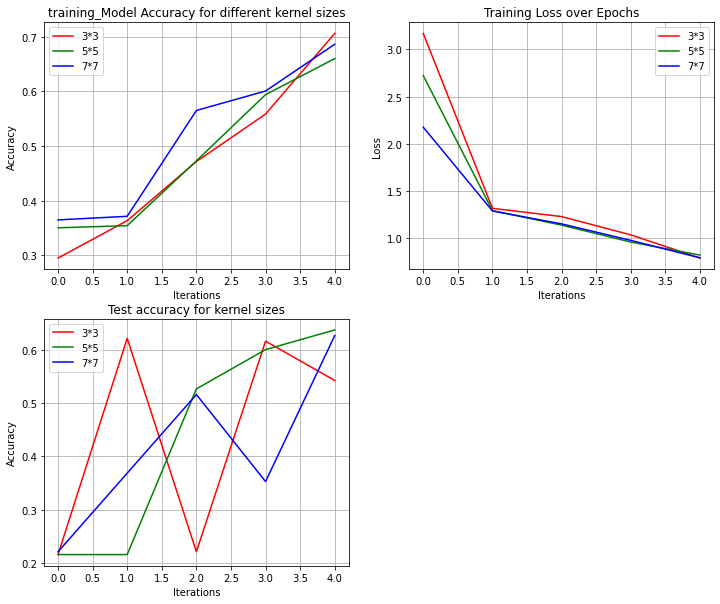

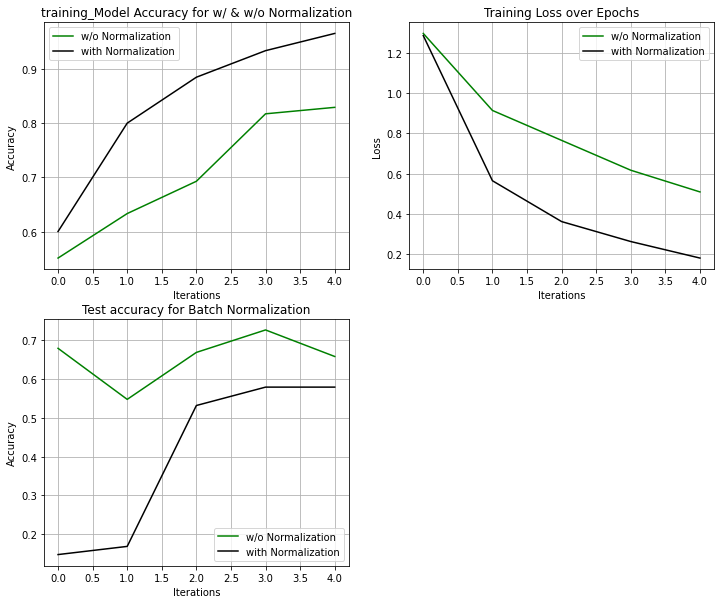

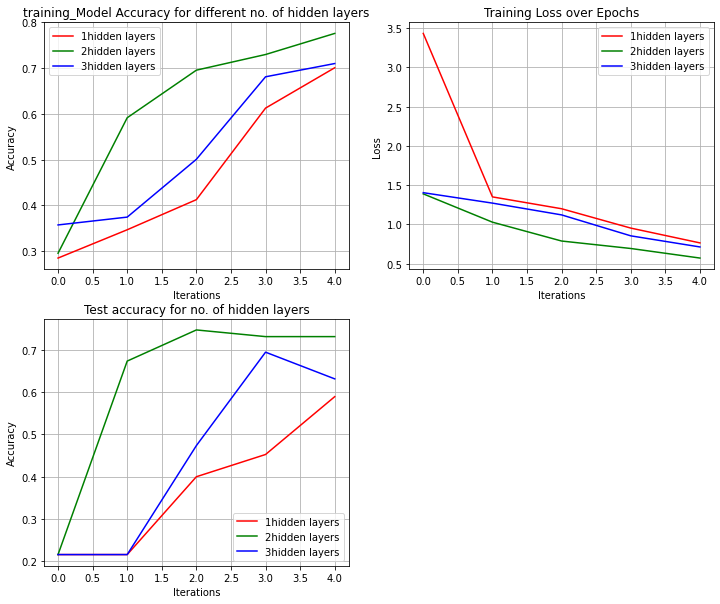

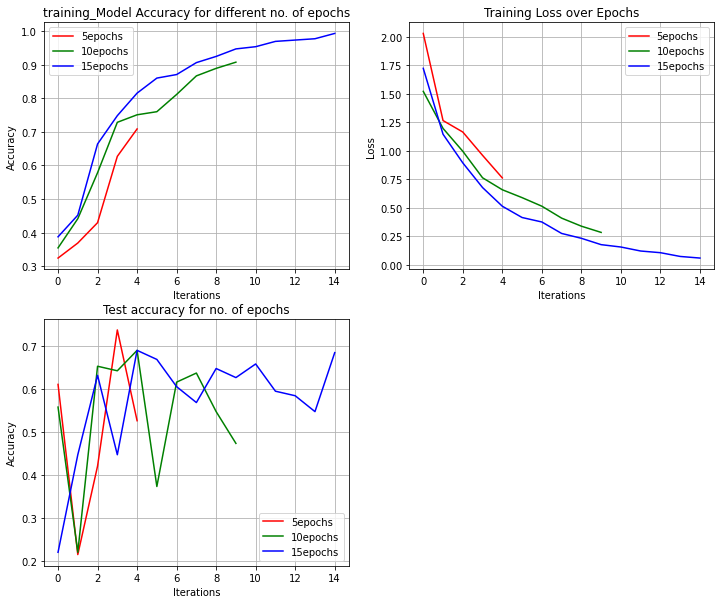

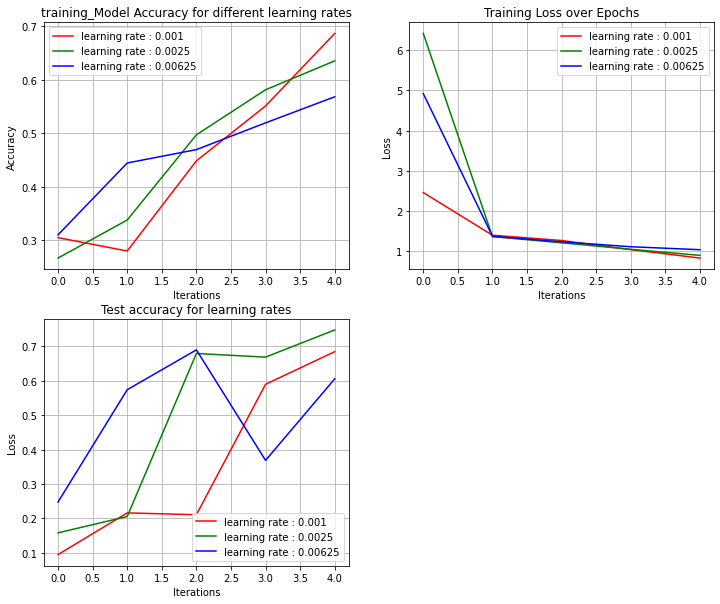

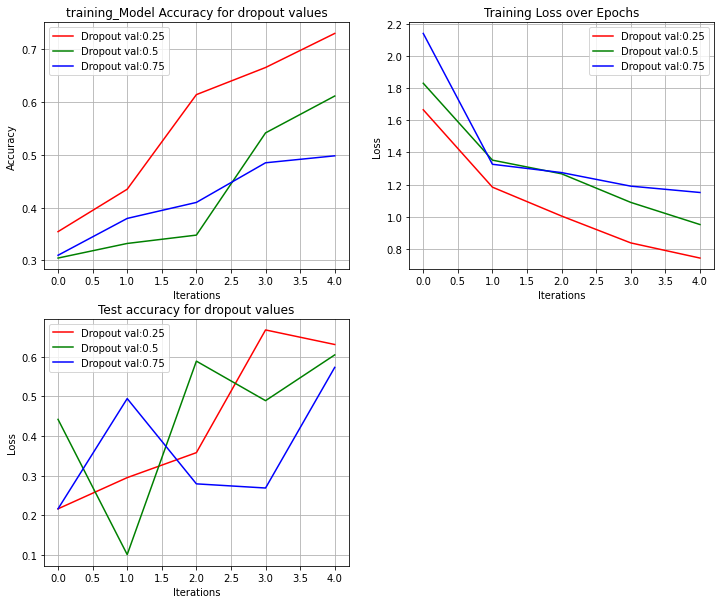

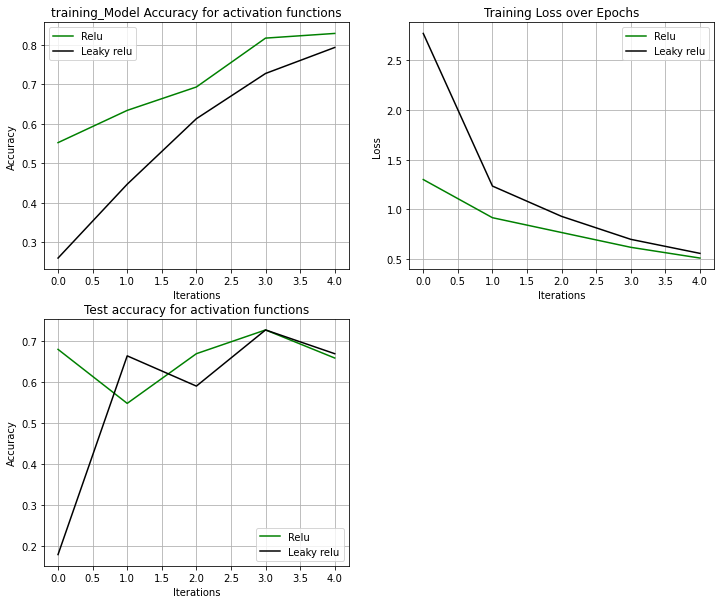

In [5]:
# TODO: write your code here
n = 3
epochs = 5
bs = 128
k = 3
col = ['r','g','b']
# Tuning kernel size
print('\033[1m'+'\nIterations for kernel sizes\n'+'\033[0m')
plt.figure(1, figsize=(12,10))
for i in range(1, n+1):
    model1 = Sequential()
    model1.add(Conv2D(32, kernel_size=(k,k), activation ='relu', input_shape=input_shape))
    model1.add(MaxPooling2D(pool_size=(2,2)))
    model1.add(Conv2D(64, kernel_size=(k,k), activation ='relu'))
    model1.add(MaxPooling2D(pool_size=(2,2)))
    model1.add(Flatten())
    model1.add(Dense(64, activation='relu'))
    model1.add(Dense(n_cat, activation='softmax'))
    model1.compile(loss=categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])
    model1_history = model1.fit(tr_imgs, tr_lbls, batch_size = bs, epochs = epochs, validation_data=(tst_imgs, tst_lbls))
    
    # Plotting the Accuracy and loss over all iterations
    
    plt.subplot(2,2,1)
    plt.plot(model1_history.history['accuracy'], c=col[i-1], label = str(k)+'*'+str(k))
    plt.title('training_Model Accuracy for different kernel sizes')
    plt.ylabel('Accuracy')
    plt.xlabel('Iterations')
    plt.legend()
    plt.grid()
   
    plt.subplot(2,2,2)
    plt.plot(model1_history.history['loss'], c=col[i-1], label = str(k)+'*'+str(k))
    plt.title('Training Loss over Epochs')
    plt.ylabel('Loss')
    plt.xlabel('Iterations')
    plt.legend()
    plt.grid()
    
    plt.subplot(2,2,3)
    plt.plot(model1_history.history['val_accuracy'], c=col[i-1], label = str(k)+'*'+str(k))
    plt.title('Test accuracy for kernel sizes')
    plt.ylabel('Accuracy')
    plt.xlabel('Iterations')
    plt.legend()
    plt.grid()
    
    # Increase kernel size
    k +=2

# Comparing Changes with batch normalization
print('\033[1m'+'\nComparison of w/ & w/o normalized batch\n'+'\033[0m')
bs = 128
k = 3
epochs = 5
# Compiling Model w/o Batch Normalization
#model.compile(loss=categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])
#model_history = model.fit(tr_imgs, tr_lbls, batch_size = batch_size, epochs = n_epochs)

# Compiling Model w/ Batch Normalization
model2 = Sequential()
model2.add(Conv2D(32, kernel_size=(k,k), activation ='relu', input_shape=input_shape))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Conv2D(64, kernel_size=(k,k), activation ='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Flatten())
model2.add(Dense(64, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dense(n_cat, activation='softmax'))
model2.compile(loss=categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])
model2_history = model2.fit(tr_imgs, tr_lbls, batch_size = bs, epochs = epochs, validation_data=(tst_imgs, tst_lbls))



# Plotting the Accuracy and loss over all iterations
plt.figure(2, figsize=(12,10))    
plt.subplot(2,2,1)
plt.plot(model_history.history['accuracy'], c='g', label = 'w/o Normalization')
plt.plot(model2_history.history['accuracy'], c='k', label = 'with Normalization')
plt.title('training_Model Accuracy for w/ & w/o Normalization')
plt.ylabel('Accuracy')
plt.xlabel('Iterations')
plt.legend()
plt.grid()

plt.subplot(2,2,2)
plt.plot(model_history.history['loss'], c='g', label = 'w/o Normalization')
plt.plot(model2_history.history['loss'], c='k', label = 'with Normalization')
plt.title('Training Loss over Epochs')
plt.ylabel('Loss')
plt.xlabel('Iterations')
plt.legend()
plt.grid()

plt.subplot(2,2,3)
plt.plot(model_history.history['val_accuracy'], c='g', label = 'w/o Normalization')
plt.plot(model2_history.history['val_accuracy'], c='k', label = 'with Normalization')
plt.title('Test accuracy for Batch Normalization')
plt.ylabel('Accuracy')
plt.xlabel('Iterations')
plt.legend()
plt.grid()

# Iterations for no. of hidden layers
print('\033[1m'+'\nIterations for no. of hidden layers\n'+'\033[0m')
plt.figure(3, figsize=(12,10))
for h in range(0,n):
    model3 = Sequential()
    model3.add(Conv2D(32, kernel_size=(k,k), activation ='relu', input_shape=input_shape))
    model3.add(MaxPooling2D(pool_size=(2,2)))
    model3.add(Conv2D(64, kernel_size=(k,k), activation ='relu'))
    model3.add(MaxPooling2D(pool_size=(2,2)))
    model3.add(Flatten())
    
    for val in range(0, h+1):
        model3.add(Dense(64, activation='relu'))
    
    model3.add(Dense(n_cat, activation='softmax'))
    model3.compile(loss=categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])
    #model3.summary()
    model3_history = model3.fit(tr_imgs, tr_lbls, batch_size = bs, epochs = epochs, validation_data=(tst_imgs, tst_lbls))
    
    # Plotting the Accuracy and loss over all iterations
    plt.subplot(2,2,1)
    plt.plot(model3_history.history['accuracy'], c=col[h], label = str(h+1)+'hidden layers')
    plt.title('training_Model Accuracy for different no. of hidden layers')
    plt.ylabel('Accuracy')
    plt.xlabel('Iterations')
    plt.legend()
    plt.grid()
    
    plt.subplot(2,2,2)
    plt.plot(model3_history.history['loss'], c=col[h], label =str(h+1)+'hidden layers')
    plt.title('Training Loss over Epochs')
    plt.ylabel('Loss')
    plt.xlabel('Iterations')
    plt.legend()
    plt.grid()
    
    plt.subplot(2,2,3)
    plt.plot(model3_history.history['val_accuracy'], c=col[h], label = str(h+1)+'hidden layers')
    plt.title('Test accuracy for no. of hidden layers')
    plt.ylabel('Accuracy')
    plt.xlabel('Iterations')
    plt.legend()
    plt.grid()
    
# Tuning number of epochs
print('\033[1m'+'\nIterations for number of epochs while model fitting\n'+'\033[0m')
epochs = 5
plt.figure(4, figsize=(12,10))
for i in range(1, n+1):
    model4 = Sequential()
    model4.add(Conv2D(32, kernel_size=(k,k), activation ='relu', input_shape=input_shape))
    model4.add(MaxPooling2D(pool_size=(2,2)))
    model4.add(Conv2D(64, kernel_size=(k,k), activation ='relu'))
    model4.add(MaxPooling2D(pool_size=(2,2)))
    model4.add(Flatten())
    model4.add(Dense(64, activation='relu'))
    model4.add(Dense(n_cat, activation='softmax'))
    model4.compile(loss=categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])
    model4_history = model4.fit(tr_imgs, tr_lbls, batch_size = bs, epochs = epochs, validation_data=(tst_imgs, tst_lbls))
    
    # Plotting the Accuracy and loss over all iterations
    
    plt.subplot(2,2,1)
    plt.plot(model4_history.history['accuracy'], c=col[i-1], label = str(epochs)+'epochs')
    plt.title('training_Model Accuracy for different no. of epochs')
    plt.ylabel('Accuracy')
    plt.xlabel('Iterations')
    plt.legend()
    plt.grid()
   
    plt.subplot(2,2,2)
    plt.plot(model4_history.history['loss'], c=col[i-1], label =str(epochs)+'epochs')
    plt.title('Training Loss over Epochs')
    plt.ylabel('Loss')
    plt.xlabel('Iterations')
    plt.legend()
    plt.grid()
    
    plt.subplot(2,2,3)
    plt.plot(model4_history.history['val_accuracy'], c=col[i-1], label = str(epochs)+'epochs')
    plt.title('Test accuracy for no. of epochs')
    plt.ylabel('Accuracy')
    plt.xlabel('Iterations')
    plt.legend()
    plt.grid()
    # Increase number of epochs by 5
    epochs +=5
# Tuning learning rate
print('\033[1m'+'\nIterations for learning rate\n'+'\033[0m')
lr = 0.001
epochs=5
plt.figure(5, figsize=(12,10))
for i in range(1, n+1):
    model5 = Sequential()
    model5.add(Conv2D(32, kernel_size=(k,k), activation ='relu', input_shape=input_shape))
    model5.add(MaxPooling2D(pool_size=(2,2)))
    model5.add(Conv2D(64, kernel_size=(k,k), activation ='relu'))
    model5.add(MaxPooling2D(pool_size=(2,2)))
    model5.add(Flatten())
    model5.add(Dense(64, activation='relu'))
    model5.add(Dense(n_cat, activation='softmax'))
    model5.compile(loss=categorical_crossentropy, optimizer=Adam(learning_rate=lr), metrics=['accuracy'])
    model5_history = model5.fit(tr_imgs, tr_lbls, batch_size = bs, epochs = epochs, validation_data=(tst_imgs, tst_lbls))
    
    # Plotting the Accuracy and loss over all iterations
    
    plt.subplot(2,2,1)
    plt.plot(model5_history.history['accuracy'], c=col[i-1], label = 'learning rate : '+str(lr))
    plt.title('training_Model Accuracy for different learning rates')
    plt.ylabel('Accuracy')
    plt.xlabel('Iterations')
    plt.legend()
    plt.grid()
   
    plt.subplot(2,2,2)
    plt.plot(model5_history.history['loss'], c=col[i-1], label = 'learning rate : '+str(lr))
    plt.title('Training Loss over Epochs')
    plt.ylabel('Loss')
    plt.xlabel('Iterations')
    plt.legend()
    plt.grid()
    
    plt.subplot(2,2,3)
    plt.plot(model5_history.history['val_accuracy'], c=col[i-1], label = 'learning rate : '+str(lr))
    plt.title('Test accuracy for learning rates')
    plt.ylabel('Loss')
    plt.xlabel('Iterations')
    plt.legend()
    plt.grid()
    # Update learning rate
    lr *= 2.5

# Tuning Dropout value
from tensorflow.keras.layers import Dropout
do_val = 0.25
print('\033[1m'+'\nIterations for Dropout values\n'+'\033[0m')

plt.figure(6, figsize=(12,10))
for i in range(1, n+1):
    model6 = Sequential()
    model6.add(Conv2D(32, kernel_size=(k,k), activation ='relu', input_shape=input_shape))
    model6.add(MaxPooling2D(pool_size=(2,2)))
    model6.add(Conv2D(64, kernel_size=(k,k), activation ='relu'))
    model6.add(MaxPooling2D(pool_size=(2,2)))
    model6.add(Flatten())
    model6.add(Dense(64, activation='relu'))
    model6.add(Dropout(do_val))
    model6.add(Dense(n_cat, activation='softmax'))
    model6.compile(loss=categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])
    model6_history = model6.fit(tr_imgs, tr_lbls, batch_size = bs, epochs = epochs, validation_data=(tst_imgs, tst_lbls))
    
    # Plotting the Accuracy and loss over all iterations
    
    plt.subplot(2,2,1)
    plt.plot(model6_history.history['accuracy'], c=col[i-1], label = 'Dropout val:'+str(do_val))
    plt.title('training_Model Accuracy for dropout values')
    plt.ylabel('Accuracy')
    plt.xlabel('Iterations')
    plt.legend()
    plt.grid()
   
    plt.subplot(2,2,2)
    plt.plot(model6_history.history['loss'], c=col[i-1], label ='Dropout val:'+str(do_val))
    plt.title('Training Loss over Epochs')
    plt.ylabel('Loss')
    plt.xlabel('Iterations')
    plt.legend()
    plt.grid()
    
    plt.subplot(2,2,3)
    plt.plot(model6_history.history['val_accuracy'], c=col[i-1], label = 'Dropout val:'+str(do_val))
    plt.title('Test accuracy for dropout values')
    plt.ylabel('Loss')
    plt.xlabel('Iterations')
    plt.legend()
    plt.grid()
    # Increase Dropout value by 0.25(25%)
    do_val +=0.25

from tensorflow.keras.layers import LeakyReLU
print('\033[1m'+'\nComparison of activation functions\n'+'\033[0m')
# Comparing different activation functions
model7 = Sequential()
model7.add(Conv2D(32, kernel_size=(k,k), activation = LeakyReLU(alpha=0.01), input_shape=input_shape))
model7.add(MaxPooling2D(pool_size=(2,2)))
model7.add(Conv2D(64, kernel_size=(k,k), activation =LeakyReLU(alpha=0.01)))
model7.add(MaxPooling2D(pool_size=(2,2)))
model7.add(Flatten())
model7.add(Dense(64, activation=LeakyReLU(alpha=0.01)))
model7.add(Dense(n_cat, activation='softmax'))
model7.compile(loss=categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])
model7_history = model7.fit(tr_imgs, tr_lbls, batch_size = bs, epochs = epochs, validation_data=(tst_imgs, tst_lbls))



# Plotting the Accuracy and loss over all iterations
plt.figure(7, figsize=(12,10))    
plt.subplot(2,2,1)
plt.plot(model_history.history['accuracy'], c='g', label = 'Relu')
plt.plot(model7_history.history['accuracy'], c='k', label = 'Leaky relu')
plt.title('training_Model Accuracy for activation functions')
plt.ylabel('Accuracy')
plt.xlabel('Iterations')
plt.legend()
plt.grid()

plt.subplot(2,2,2)
plt.plot(model_history.history['loss'], c='g', label = 'Relu')
plt.plot(model7_history.history['loss'], c='k', label = 'Leaky relu')
plt.title('Training Loss over Epochs')
plt.ylabel('Loss')
plt.xlabel('Iterations')
plt.legend()
plt.grid()

plt.subplot(2,2,3)
plt.plot(model_history.history['val_accuracy'], c='g', label = 'Relu')
plt.plot(model7_history.history['val_accuracy'], c='k', label = 'Leaky relu')
plt.title('Test accuracy for activation functions')
plt.ylabel('Accuracy')
plt.xlabel('Iterations')
plt.legend()
plt.grid()

### Analysis of effects of different hyperparamters

#### Kernel_Size:
    - It can be observed that with the increase in kernel size, the performance of models is similar but the time of computation tends to increase
    - Based on the test set performance, kernel size of 5*5 gives better performance.

#### Batch Normalization:
    - Doing batch normalization increases the accuracy of the model
    - Batch normalization after every Conv2D and Dense layer tends to reduce performance a bit for the test set.
    - Normalizing after the last Conv2D layer and the after the last hidden layers might give better performance

#### No. of hidden layers:
    - It can be observed that for two hidden layers, the performance of the model tends to be best for test set
    - The time of computation is almost same for different no. of hidden layers

#### No. of epochs:
    - With increase in no. of epochs, the accuracy for training set increases but the time of computation increases significantly
    - The model seems to be overfitting, the high variance could be because of complexity of the model with 2 Conv2D layers.

#### Learning rates:
    - As the learning rate increases, the accuracy of training model reduces
    - Learning rate of 0.0025 gives good test set accuracy compared to rates 0.001 or 0.00625      even the bias is small
    
#### Dropout values:
    - With increase in value of Dropout, the performance of the model decreases
    - The value of 0.25 gives best performance    

#### Activation functions:
    - It can be observed that both ReLU and Leaky ReLU perform similarly on the test set but the Leaky ReLU fluctuates a lot between epochs and consumes more time than ReLU
    - Thus, ReLU gives better overall performance.
    

## Task 5: Conclusion

Epoch 1/10
6/6 [==============================] - 14s 2s/step - loss: 1.9945 - accuracy: 0.3785 - val_loss: 1.2596 - val_accuracy: 0.4737
Epoch 2/10
6/6 [==============================] - 13s 2s/step - loss: 0.9509 - accuracy: 0.6728 - val_loss: 1.5236 - val_accuracy: 0.2158
Epoch 3/10
6/6 [==============================] - 12s 2s/step - loss: 0.6783 - accuracy: 0.7516 - val_loss: 1.3313 - val_accuracy: 0.4684
Epoch 4/10
6/6 [==============================] - 13s 2s/step - loss: 0.5706 - accuracy: 0.7848 - val_loss: 1.4164 - val_accuracy: 0.3789
Epoch 5/10
6/6 [==============================] - 12s 2s/step - loss: 0.4289 - accuracy: 0.8682 - val_loss: 1.4198 - val_accuracy: 0.4579
Epoch 6/10
6/6 [==============================] - 13s 2s/step - loss: 0.2793 - accuracy: 0.9307 - val_loss: 1.3496 - val_accuracy: 0.5105
Epoch 7/10
6/6 [==============================] - 12s 2s/step - loss: 0.2041 - accuracy: 0.9637 - val_loss: 1.3254 - val_accuracy: 0.4947
Epoch 8/10
6/6 [==================

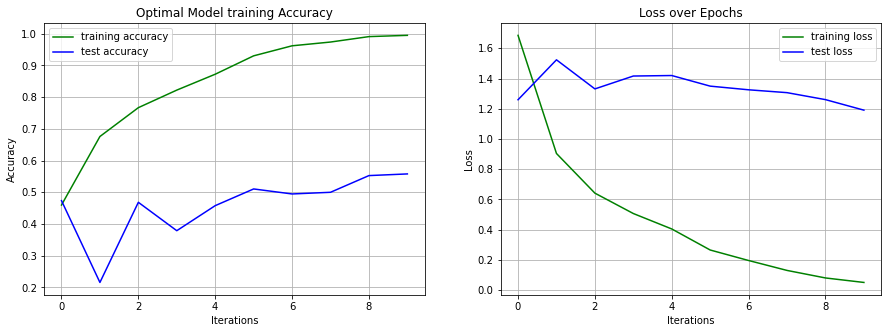

In [19]:
# TODO: write your code here

# Optimal model
epochs = 10
modelop = Sequential()
modelop.add(Conv2D(64, kernel_size=(5,5), activation ='relu', input_shape=input_shape))
#modelop.add(MaxPooling2D(pool_size=(2,2)))
#modelop.add(Conv2D(64, kernel_size=(3,3), activation ='relu'))
modelop.add(BatchNormalization())
modelop.add(MaxPooling2D(pool_size=(2,2)))
modelop.add(Flatten())

modelop.add(Dense(64, activation='relu'))
#modelop.add(BatchNormalization())
#modelop.add(Dropout(0.25))

modelop.add(Dense(64, activation='relu'))
modelop.add(BatchNormalization())
modelop.add(Dropout(0.25))
modelop.add(Dense(n_cat, activation='softmax'))
modelop.compile(loss=categorical_crossentropy, optimizer=Adam(learning_rate=0.0025), metrics=['accuracy'])
modelop_history = modelop.fit(tr_imgs, tr_lbls, batch_size = bs, epochs = epochs, validation_data=(tst_imgs, tst_lbls))

# Plotting the Accuracy and loss over all iterations
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.plot(modelop_history.history['accuracy'], c='g', label = 'training accuracy')
plt.plot(modelop_history.history['val_accuracy'], c='b', label = 'test accuracy')
plt.title('Optimal Model training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Iterations')
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.plot(modelop_history.history['loss'], c='g', label = 'training loss')
plt.plot(modelop_history.history['val_loss'], c='b', label = 'test loss')
plt.title('Loss over Epochs')
plt.ylabel('Loss')
plt.xlabel('Iterations')
plt.legend()
plt.grid()

# Evaluating the model on test set
loss, acc = modelop.evaluate(tst_imgs, tst_lbls, batch_size = batch_size, verbose=0)
print("Test loss for optimal model: ", loss)
print(f"Test accuracy for optimal model: {acc * 100}%")

##### The performance of the training model is high but the test accuracy doesn't increase after 56%, this is due to over-fitting which could further be reduced with more data and decreasing model complexity a bit

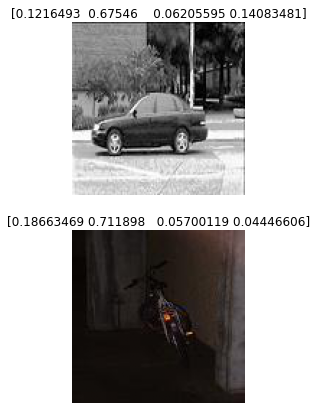

In [26]:
x = np.random.randint(0, 190, size = 2)
# Plotting training sample of each class
plt.figure(2,figsize=(7,7))
ex_labels = modelop.predict(tst_imgs[x])
for i in range(0, 2):
  
    
    plt.subplot(2, 1, i+1)
    plt.imshow(tst_imgs[x[i]])
    plt.title(ex_labels[i])
    plt.axis('off')